
# <p style="background-color:#084C61;font-family:verdana;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Projeto de Clusterização e Análise Exploratória de Clientes de um Mercado</p>

Autor: Pedro Lourenço Mendes Júnior

[Linkedin](https://www.linkedin.com/in/mendesjuniorpedro/)

Olá. 

Abaixo você poderá conferir um trabalho pessoal, com fins de desenvolvimento das habilidades e estudo, onde exploraremos técnicas avançadas de análise de dados, machine learning, linguaguem python, além de compreender um pouco mais sobre o comportamento de clientes de um mercado. 

### Introdução

Em um mundo cada vez mais **orientado por dados**, muitas empresas buscam extrair informações valiosas a partir dos dados que à cercam. Dado um número grande de informações, surgem possibilidades para que possamos compreender melhor o todo, encontrar alguns padrões, tendências, casos estranhos e etc. Nesse sentido, a **análise exploratória de dados** é uma etapa fundamental nesse processo, pois nos permite examinar e visualizar os padrões presentes nos dados, compreendendo assim as suas características e potencialidades. Além disso, os **modelos de machine learning** se popularizaram nos últimos anos com o avanço tecnológico e potencializaram a tomada de decisão por meio dos dados, o data driven.

Os dados utilizados nesse projeto são provenientes do [Kaggle.com](https://www.kaggle.com/) e podem ser acessados **clicando [aqui.](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)** Trata-se de um conjunto de dados hipotéticos de clientes que realizaram compras de um determinado intervalo de tempo. Cada registro reprensenta um cliente e as suas características como, idade, formação, salário, histórico de compras por departamento, visitas ao website da empresa e etc. 

### Objetivos do Projeto

O principal objetivo deste projeto é aplicar técnicas de análise exploratória, limpeza e aprendizado de máquina para **segmentar os clientes em grupos distintos**, conhecidos como 'clusters'. A ideia é segmentar para entender melhor o perfil dos clientes e identificar os possíveis padrões de comportamentos entre os clientes do grupo. 

### O que é Clusterização? 

Clusterização é uma técnica de aprendizado não supervisionado que segmenta os objetos similares em um mesmo subconjunto, chamado de cluster. O objetivo da técnica é criar alguns subconjuntos de dados de forma que os **elementos do subconjunto sejam mais homogêneos internamente**, ou seja, mais parecidos ou próximos. Essa abordagem é interessante para encontrar padrões que poderiam se perder ao olhar para o conjunto inteiro mas podem ser analisadas nos subconjuntos. Com isso, a clusterização se torna útil na tomada de decisões podendo contruir em diversas áreas como marketing, segmentação de clientes, análise de imagens e entre outras.

Neste projeto, empregaremos um **algoritmo K-Means de clusterização** para segmentar os clientes do mercado em alguns subconjuntos com base nas suas características. 

<img src="https://images.unsplash.com/photo-1605447813584-26aeb3f8e6ae?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1470&q=80">

## <p style="background-color:#084C61;font-family:verdana;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Índice</p> 

* [1. Bibliotecas e algumas funções utilizadas](#1)

    
* [2. Carregamento dos dados](#2)

    
* [3. Análise Exploratória e Limpeza dos Dados](#3)
    * [3.1. Variáveis "People"](#3.1)
    * [3.2. Variáveis "Products"](#3.2)
    * [3.3. Variáveis "Promotion"](#3.3)
    * [3.4. Variáveis "Place"](#3.4)
    * [3.5. Reagrupando os Dataframes](#3.5)
    
    
* [4. Normalização das Variáveis](#4)   

    
* [5. Método de Elbow](#5) 


* [6. Alocação de Pesos](#6)


* [7. Modelo K-Means](#7)
    
    * [7.1. Salvando o Modelo](#7.1)


* [8. Resultados do Modelo](#8)
    * [8.1. Sugestões de negócios](#8.1)


* [9. Conclusão](#9)


<a id="1"></a>
## <p style="background-color:#084C61;font-family:verdana;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">1. Bibliotecas e algumas funções utilizadas</p> 

In [360]:
# Bibliotecas utilizadas no projeto:

import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from functools import reduce
import pickle
import warnings
warnings.filterwarnings('ignore')

In [361]:
# Algumas funções interessantes para facilitar o código:

# Função para investigar a presença de valores nulos em cada uma das características em quantidade e porcentagem:
def show_null(df):
    null_columns = (df.isnull().sum(axis=0)/len(df)*100).sort_values(ascending=False).index
    
    null_data = pd.concat([df.isnull().sum(axis=0), 
                            (df.isnull().sum(axis=0)/len(df)*100).sort_values(ascending=False),
                            df.loc[:,df.columns.isin(list(null_columns))].dtypes], 
                            axis = 1)
    
    null_data = null_data.rename(columns = {0:'Quantidade', 1:'% de nulos', 2:'Tipo'}).sort_values(ascending=False, by = '% de nulos')
    return null_data

# Função para plotar dois gráficos (boxplot e strip) para variáveis numéricas:
def plot_num(df, feature):
    fig = plt.figure(figsize = (12,6))
    gs = GridSpec(1,2)
    sns.boxplot(y=feature, data = df, color = 'firebrick', ax = fig.add_subplot(gs[0,0]))
    plt.ylabel(feature)
    sns.stripplot(y=df[feature], color = 'steelblue', ax = fig.add_subplot(gs[0,1]))
    plt.ylabel(None)
    plt.show()

# Função para plotar um gráfico de barras (countplot) para variáveis categóricas:

def plot_cat(df, feature):
    fig = plt.figure(figsize = (12,6))
    ax = sns.countplot(data = df, x = feature)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}',
                    (p.get_x()+0.4, p.get_height()+8), ha = 'center', color = 'black')
    plt.xlabel('\n' + feature)
    plt.ylabel('Quantidade de Clientes')
    plt.show()

<a id="2"></a>
## <p style="background-color:#084C61;font-family:verdana;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">2. Carregamento dos dados</p> 

[Link no Kaggle.com com os dados:](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

In [362]:
df = pd.read_csv('marketing_campaign.csv', delimiter = '\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


  Com o carregamento dos dados já podemos dar uma olhada superficial nos dados e perceber os seus tipos, características presentes, tamanho do dataset e entre outras informações. 
<a id="3"></a>
## <p style="background-color:#084C61;font-family:verdana;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">3. Análise Exploratória e Limpeza dos Dados</p> 

Na página do dataset no Kaggle.com, o criador do dataset apresenta as características/features em quatro grupos: People, Products, Promotions e Place. Vamos aderir a essa divisão e trabalhar separadamente cada parte durante a próxima etapa de Análise Exploratória e Limpeza dos Dados, preservando a coluna "ID" que é o identificador único de cada cliente e será fundamental para juntar as informações no final.

<a id="3.1"></a>
### <p style="background-color:#084C61;font-family:verdana;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">3.1. Variáveis "People"</p> 
**Tratam-se das variáveis que definem o cliente na sua vida social, como estado civil, idade, rendimento familiar e etc.** Além disso, temos algumas variáveis que se conectam como cliente-mercado, como o número de dias desde a última compra, a ocorrência ou não de reclamações por parte do cliente e o tempo em que a pessoa é cliente do mercado.  

* **ID**: Identificador único do usuário
* **Year_Birth**: Data de nascimento do cliente
* **Education**: Grau de escolaridade do cliente
* **Marital_Status**: Estado civil do cliente
* **Income**: Rendimento familiar anual do cliente
* **Kidhome**: Número de crianças no domicílio
* **Teenhome**: Número de adolescentes no domicílio
* **Dt_Customer**: Data da inscrição do cliente
* **Recency**: Número de dias desde a última compra do cliente
* **Complain**: Booleano: 1 caso houve reclamação do cliente no últimos 2 anos, 0 para o caso de não haver reclamação

In [363]:
# Separando as variáveis "People":

people = df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Complain']]
people.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0


In [364]:
# Verificando a presença de valores nulos e os tipos de cada variável:

show_null(people)

,Quantidade,% de nulos,Tipo
Income,24,1.071429,float64
ID,0,0.000000,int64
Year_Birth,0,0.000000,int64
Education,0,0.000000,object
Marital_Status,0,0.000000,object
Kidhome,0,0.000000,int64
Teenhome,0,0.000000,int64
Dt_Customer,0,0.000000,object
Recency,0,0.000000,int64
Complain,0,0.000000,int64


Alguns detalhes importantes da nossa análise até o momento:
* Existem alguns valores nulos na variável **Income (Rendimento familiar anual)**, por sorte o quantidade é bem pequena, representando pouco mais de 1% dos dados. Desta forma, por se tratar de uma variável bastante importante para o nosso projeto, vamos eliminar os clientes que possuem valores nulos nessa variável. Uma outra opção seria substituir os valores ausentes por alguma métrica mas neste caso vamos optar pela exlusão mesmo, sem grandes perdas de dados. 

* Podemos perceber a presença de algumas variáveis categóricas, visto que isso é um problema quando queremos trabalhar com modelos de Machine Learning, devemos tratar essas variáveis e transformá-las em números para que se adequem ao KMeans.

* A variável **Dt_Customer (data da inscrição do cliente)**, por se tratar de data, seria melhor se tivesse no formato datetime. Sendo assim, vamos alterar o tipo da variável.

In [365]:
# Eliminando os valores nulos:
people.dropna(inplace=True)

In [366]:
# Transformando o tipo da variável "Dt_Customer" para datetime:
people.Dt_Customer = pd.to_datetime(people.Dt_Customer, dayfirst = True)

## Variável: Income

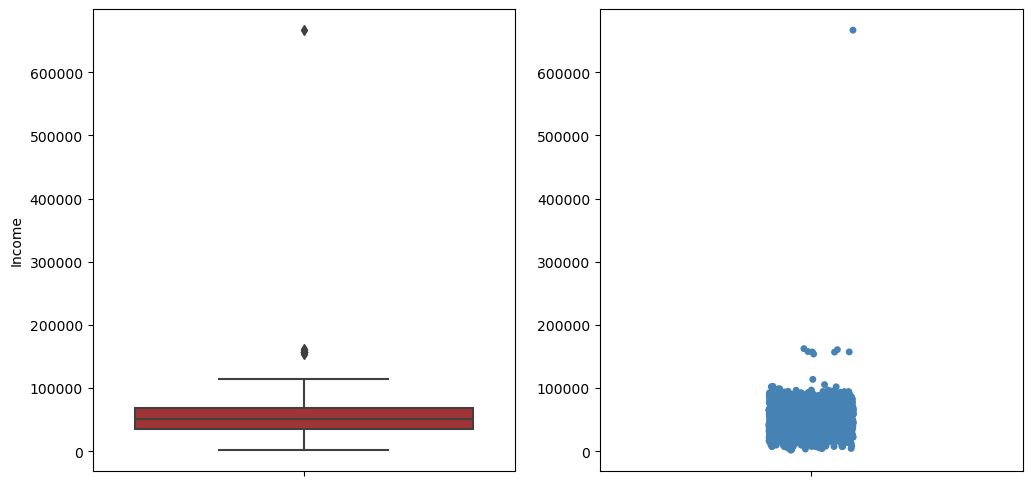

In [367]:
plot_num(df,'Income')

Podemos perceber a presença de alguns outliers e, em especial, um deles foge bastante dos demais dados. Sendo assim, vamos eliminar esse único outlier que possui um Income extremamente superior em relação aos demais. 

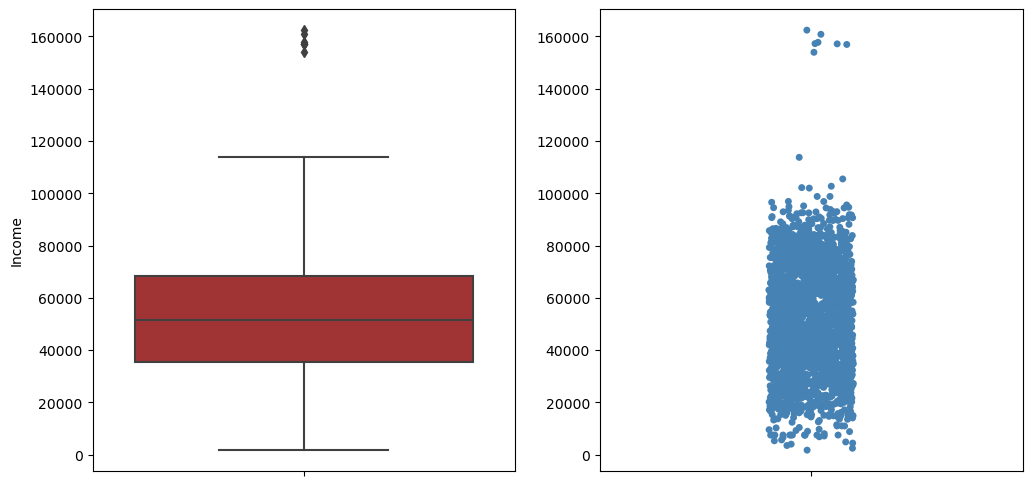

In [368]:
# Filtrando as pessoas que recebem um Income abaixo de 20k:
people = people[people.Income < 200000]
plot_num(people,'Income')

Agora podemos perceber com mais clareza a distribuição dos nossos dados em relação a essa variável, podemos ver que a grande maior dos clientes possuem o Incame variando entre 40k e 70k, sendo que alguns clientes possuem Income bem baixo, com valores próximos de zero enquanto os maiores valores ficam próximos de 160k. 

## Variável: Year Birth

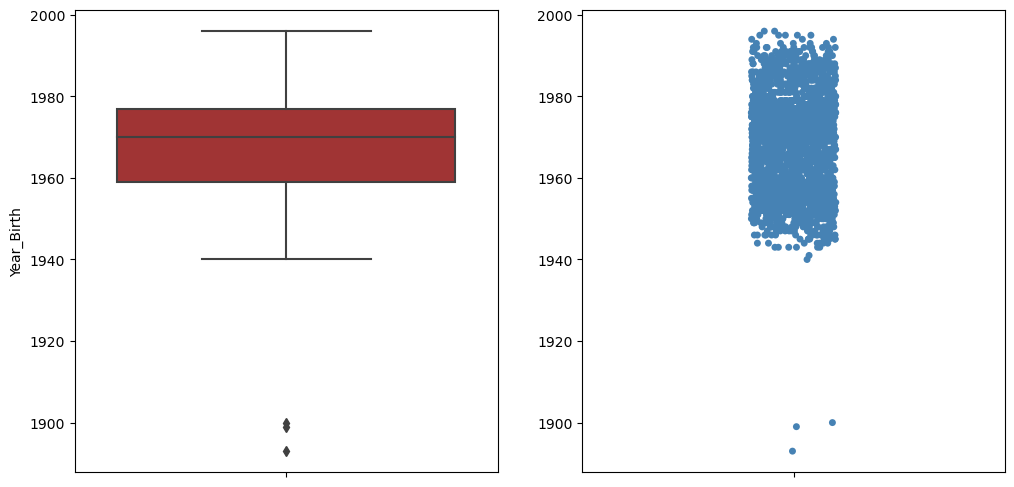

In [369]:
plot_num(people, 'Year_Birth')

Existe a presença de alguns outliers, como podemos ver. Em geral, o ano de nascimento dos clientes é superior a 1940, porém existem 3 casos de anos próximos de 1900. Talvez isso seja algum problema de digitação e, por conta disso, vamos eliminar também esses casos. 

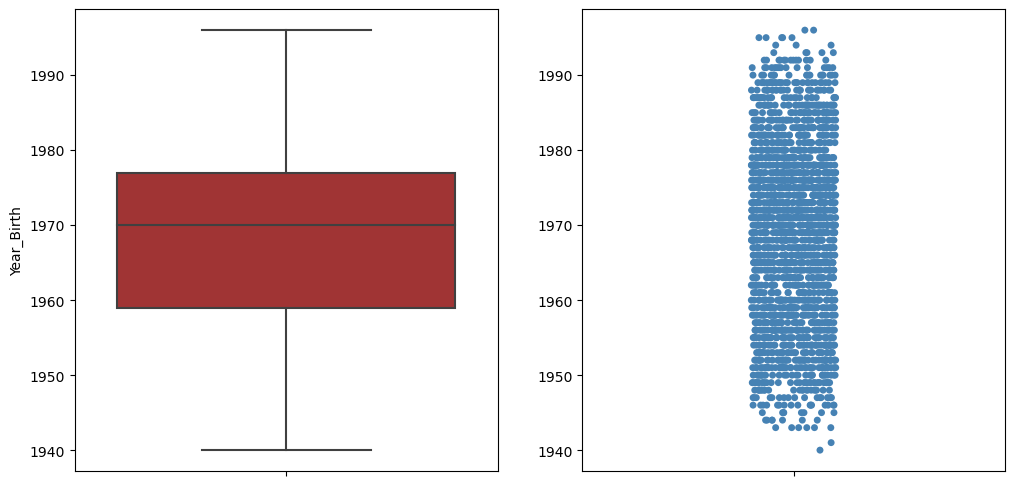

In [370]:
# Filtrando as pessoas que nasceram apenas de 1930 em diante.
people = people[people.Year_Birth > 1930]
plot_num(people, 'Year_Birth')

Aqui temos um caso de uma variável bem distribuída, a média é por volta de 1970 sendo o menor caso em 1940 e o maior caso próximo do ano 2000. Podemos ver que teremos clientes de diversas faixas etarias. 

## Variável: Education

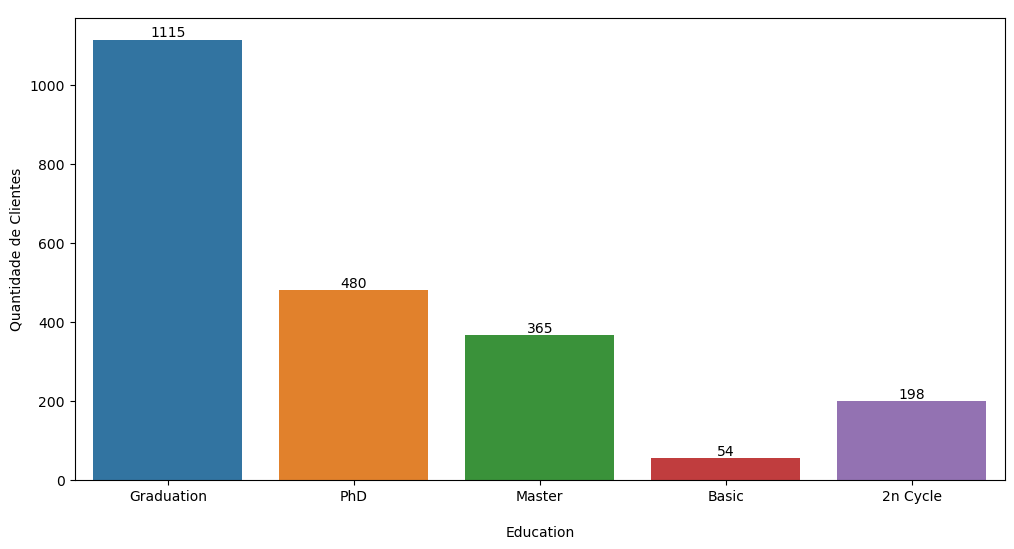

In [371]:
plot_cat(people, 'Education')

A variável de Educação é categórica então isso acarretará num problema se não for tratada e transformada em número. Sendo assim, a transformação de variáveis categóricas possue mais uma estratégia e vai depender muito do dado que está sendo trabalhado. Neste caso, é bastante aceitável que possamos imaginar uma escala crescente na graduação do cliente, sendo "Basic" o nível mais baixo de educação formal e o "PhD" o nível mais alto. Então, proceguiremos com uma transformação ordinal atribuindo número para cada uma das categorias, mantendo os níveis de educação formal. 

In [372]:
# Transformação da variável seguindo o dicionários criado:
map_education = {'Basic':0,'2n Cycle':1,'Graduation':2,'Master':3,'PhD':4}
people.Education = people.Education.map(map_education)

## Variável: Marital Status

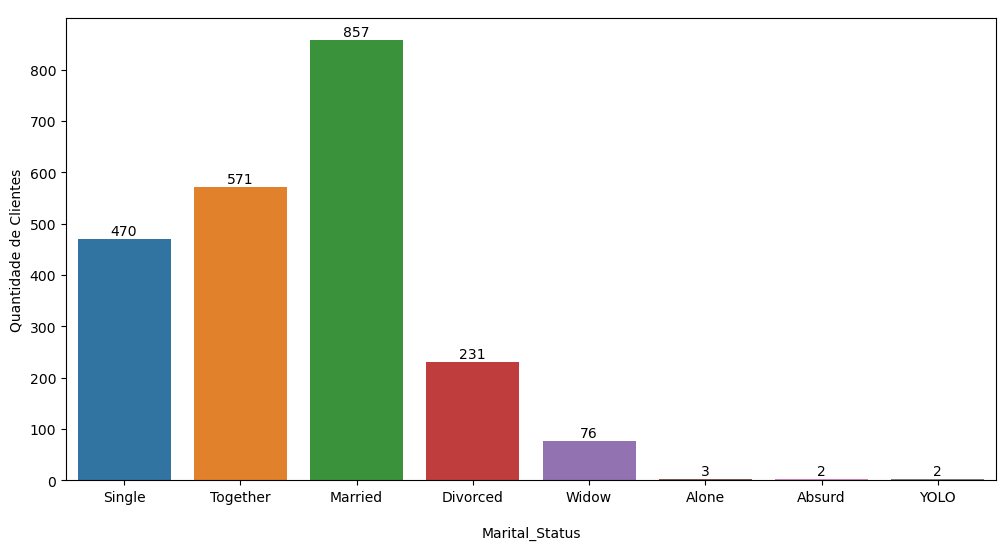

In [373]:
plot_cat(people, 'Marital_Status')

A variável **"Marital_Status"** também é categórica e possui algumas implicações diferentes. Neste caso não podemos seguir uma lógica parecida com o caso anterior por não existir uma ordenação no estado civil das pessoas, por exemplo, solteiro não é maior ou melhor do que casado e etc. Sendo assim, a ordenação por números não é interessante. 

Além disso, um outro problema é o número de categorias, seria bom que o número de categorias fosse menor. Dado que só existem 2 casos de "Absurd", vamos simplesmente eliminar esses dois casos, sem grandes perdas. 

Outra maneira de reduzir o número de categorias é agrupar duas ou mais categorias em uma só. Sendo assim, vamos agrupar as categorias "YOLO" e "Alone" junto com "Single" já que se trata dos clientes solteiros, de maneira geral. 

As categorias "Together" e "Married" também serão agrupadas, não faremos distinção entre os clientes que já casaram para os clientes que só possuem uma relação estável com outra pessoas. 

In [374]:
# Filtrando as pessoas que não faz parte da categoria "Absurd":
people = people[people.Marital_Status != 'Absurd']

In [375]:
# Agrupando as categorias:
people.Marital_Status = people.Marital_Status.apply(lambda x: 'Single' if x == 'Alone' 
                           else('Single' if x =='YOLO' 
                                else 'Together' if x == 'Married' else x))

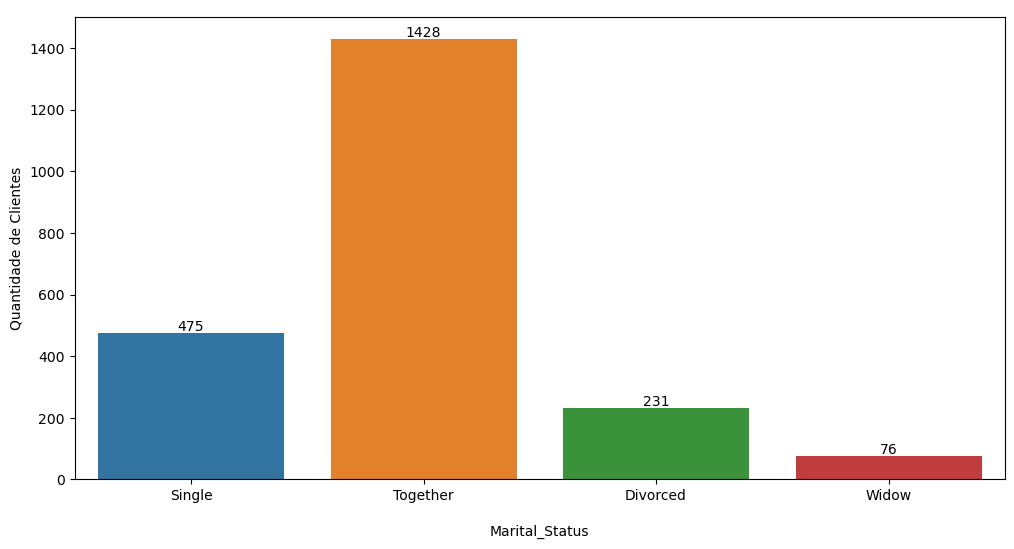

In [376]:
plot_cat(people, 'Marital_Status')

Assim ficou a nossa contagem por categoria da variável **"Marital_Status"**, a maior presença é de clientes que possuem um acompanhando, seguido das pessoas solteiras e divorciadas, respectivamente. 

Agora devemos tratar do segundo problema da variável que é a transformação da variável categórica em numérica. Vamos utilizar uma estratégia diferente que é a **get_dummies** ou **OneHotEncoder**. Existe uma pequena diferença entre as duas, mas neste caso vamos aplicar a **get_dummies**. Basicamente o que essa estratégia faz é criar uma coluna para cada categoria da variável e atribuir 1 para os clientes que estão naquela categoria e 0 em todo o resto. Por exemplo, imagine uma pessoa solteira, o nosso dataset expandirá a variável **"Marital_Status"** em 4 novas colunas (Single, Together, Divorced, Widow), então esse cliente terá **valor 1 na coluna "Single"** e 0 nas três colunas restantes. 

Essa transformação é amplamente utilizada e podemos perceber o nosso interesse em reduzir a quantidade de categorias, haja visto que uma grande quantidade de categorias teriamos uma expansão muito grande do dataset, criando muitas colunas novas. 

In [377]:
people = pd.get_dummies(people)

## Variável: Kidhome

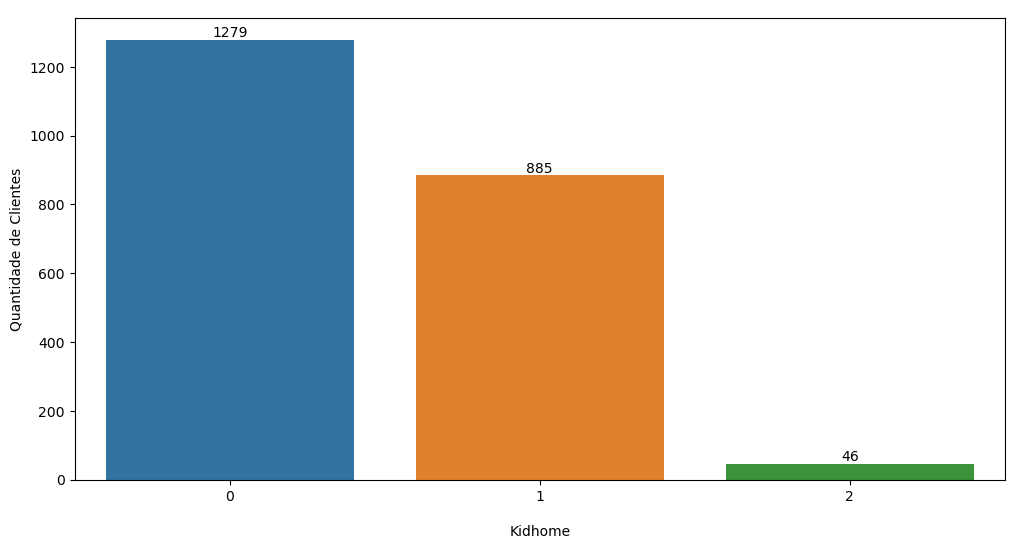

In [378]:
plot_cat(people, 'Kidhome')

## Variável: TeenHome

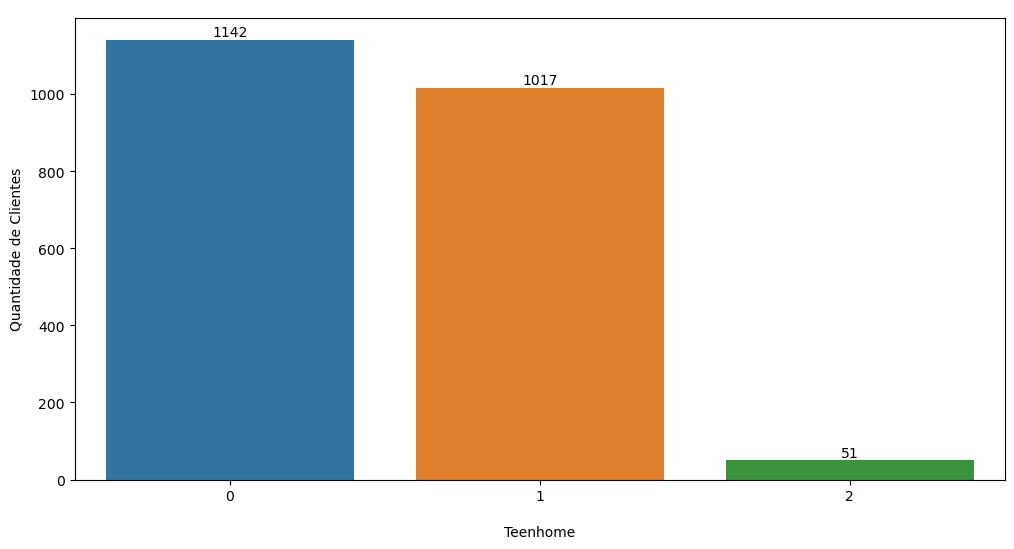

In [379]:
plot_cat(people, 'Teenhome')

Ambas as variáveis são bastante parecidas e, neste caso, houve uma diferenciação entre crianças e adolescentes. Para não trabalhar com duas variáveis bastante próximas, vamos optar por junta-las em uma variável só. Vamos simplesmente somar a quantidade de crianças e adolescentes que cada cliente possui em casa e criar a variável **"ChildrenHome"**. Após esse processo, podemos dispensar as duas variáveis anteriores.

## Variável: Children Home

In [380]:
# Somando as variáveis KidHome e TeenHome para criar a nova variável ChildrenHome:

people['ChildrenHome'] = people.Kidhome + people.Teenhome

In [381]:
# Excluindo as duas variáveis que deram forma para a variável ChildrenHome:
people.drop(columns = ['Kidhome', 'Teenhome'], inplace = True)

## Variável: Dt_Customer

A variável **Dt_Customer** trata da data em que o cliente foi cadastrado na sistema da empresa. Essa data por si só não nos fornece tanta informação, e é bastante aceitável pensar que seria melhor trabalhar com o tempo em que a pessoa já é cliente do estabelecimento. Sendo assim, vamos criar a variável **Lifetime Customer** para calcular a quanto tempo a pessoa é cliente. Para isso, vamos pegar a data mais nova do nosso dataset (data do ultimo cadastro somado ao tempo de ausência dos clientes) e reduzir a data em que cada cliente foi cadastrado.

In [382]:
# Calculando o cliente mais antigo no sistema:
people.Dt_Customer.min()

Timestamp('2012-07-30 00:00:00')

In [383]:
# Calculando o cliente mais 
people.Dt_Customer.max()

Timestamp('2014-06-29 00:00:00')

In [384]:
# Somando a data de cadastro com o tempo de ausência em compras para determinar a data limite do nosso dataset:
(people['Dt_Customer'] + pd.to_timedelta(people['Recency'], unit ='d')).max()

Timestamp('2014-10-04 00:00:00')

## Variável: Lifetime Customer

In [385]:
# Criando a nova variável:
people['LifeTime'] = (pd.to_datetime('2014-10-05') - people['Dt_Customer']).dt.days/30

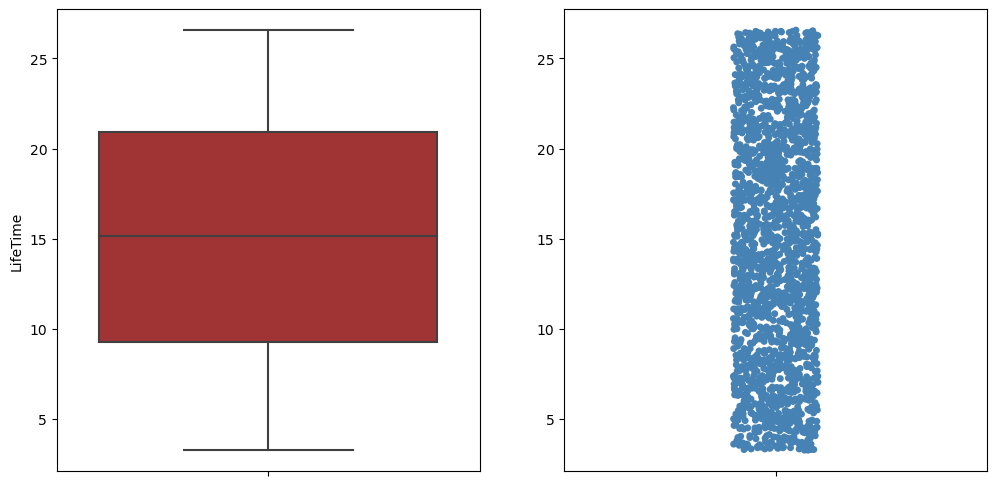

In [386]:
plot_num(people, 'LifeTime')

A nova variável é bem distribuída e nos mostra que, em média, os clientes estão a 15 meses conectados com a empresa, seja comprando ou não. Existem um bom número de clientes recentes e até clientes mais antigos, já próximos dos 30 meses. 

## Variável: Recency

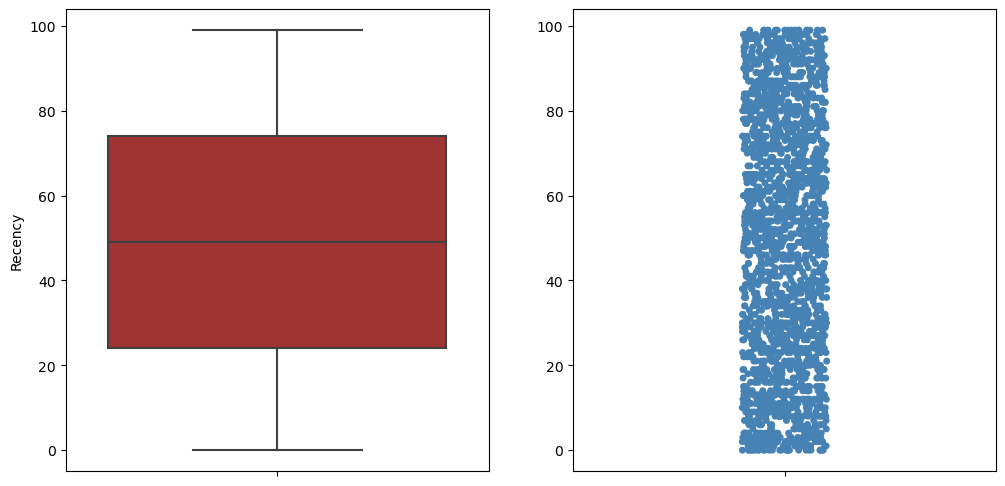

In [387]:
plot_num(people, 'Recency')

Variável que mostra o tempo decorrido desde a última compra do cliente, em dias. Podemos ver que, em média, os clientes estão a 50 dias sem comprar no mercado mas a variável é bastante heterogênea, temos clientes com diferentes perfis em relação a isso. 

## Variável: Complain

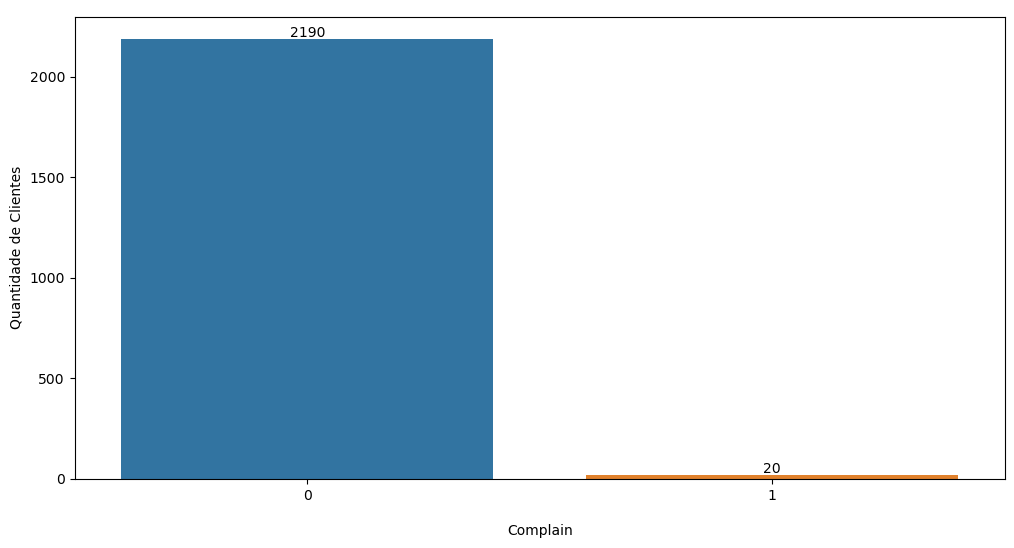

In [388]:
plot_cat(people, 'Complain')

A variável **"Complain"** indica o número de clientes que fez alguma reclamação nos últimos dois anos. É uma variável booleana onde o 1 indica que houve reclamação e 0 para os clientes que não apresentaram queixas. Pela quantidade muito pequena de casos de reclamação, é bastante aceitável descartar essa variável, já que ela agrega muito pouco para diferenciar os clientes já que praticamente todos estão na mesma categoria. Sendo assim, prosseguiremos com a exclusão da variável **"Complain"** e da variável **"Dt_Customer"** que foi substituída pela variável **"LifeTime"**. 

In [389]:
# Exclusão das colunas "Complain" e "Dt_Customer":
people.drop(columns=['Complain', 'Dt_Customer'], inplace = True)

<a id="3.2"></a>
### <p style="background-color:#084C61;font-family:verdana;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">3.2. Variáveis "Products"</p> 

Chegamos ao nosso segundo grupo de variáveis, as variáveis **"Products"**. Basicamente, esse grupo de variáveis se trata de algumas categorias de produtos como: carnes, peixes, vinhos, doces e etc. Cada variável fornece o total gasto pelo cliente nos últimos 2 anos.  

* **MntWines**: Valor gasto em vinho nos últimos 2 anos.
* **MntFruits**: Valor gasto em frutas nos últimos 2 anos.
* **MntMeatProducts**: Valor gasto em carnes nos últimos 2 anos.
* **MntFishProducts**: Valor gasto em peixes nos últimos 2 anos.
* **MntSweetProducts**: Valor gasto em doces nos últimos 2 anos.
* **MntGoldProds**: Valor gasto em objetos de ouro nos últimos 2 anos.

In [390]:
products = df[['ID','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [391]:
products.head()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5524,635,88,546,172,88,88
1,2174,11,1,6,2,1,6
2,4141,426,49,127,111,21,42
3,6182,11,4,20,10,3,5
4,5324,173,43,118,46,27,15


In [392]:
# Verificando a presença de dados nulos:
show_null(products)

,Quantidade,% de nulos,Tipo
ID,0,0.0,int64
MntWines,0,0.0,int64
MntFruits,0,0.0,int64
MntMeatProducts,0,0.0,int64
MntFishProducts,0,0.0,int64
MntSweetProducts,0,0.0,int64
MntGoldProds,0,0.0,int64


Esse grupo de variáveis está mais bem comportado em relação ao anterior, visto que não tem casos nulos em nenhuma variável e, além disso, todas as variáveis são numéricas. Vamos agora olhar para cada uma separadamente e depois fazer algumas alterações.

## Variável: MntWines

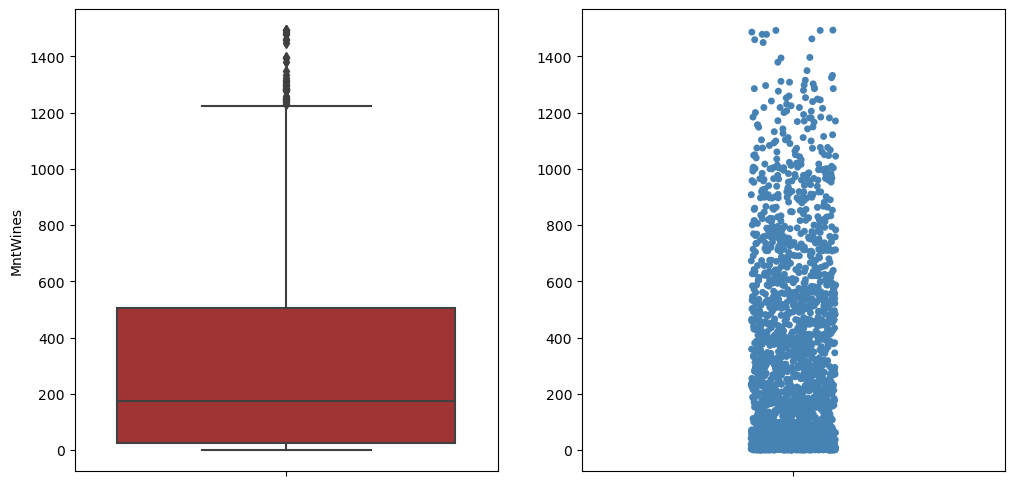

In [393]:
plot_num(products,'MntWines')


Um detalhe importante ao analisar esses gráficos é que estamos olhando o valor absoluto de gasto com vinho, então não é possível dizer se a pessoa gasta muito com esses itens específicos sem saber o gasto total do cliente. Seria mais interessante olharmos para o percentual gasto com vinhos em relação ao montante total gasto pelo cliente. Esse tipo de análise será importante para as variáveis que seguem abaixo. Percebe-se também que existem algumas pessoas que possuem um gasto bem elevado de vinhos. 

## Variável: MntFruits

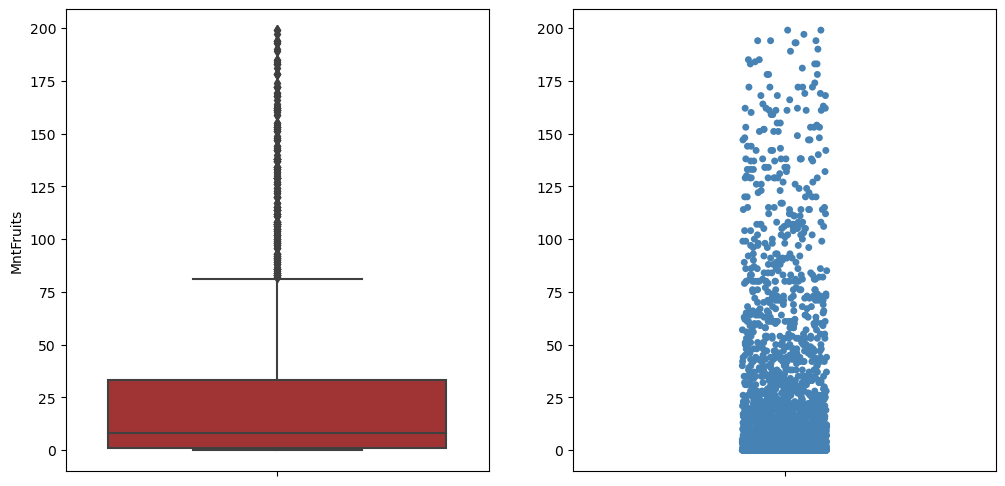

In [394]:
plot_num(products,'MntFruits')

## Variável: MntMeatProducts

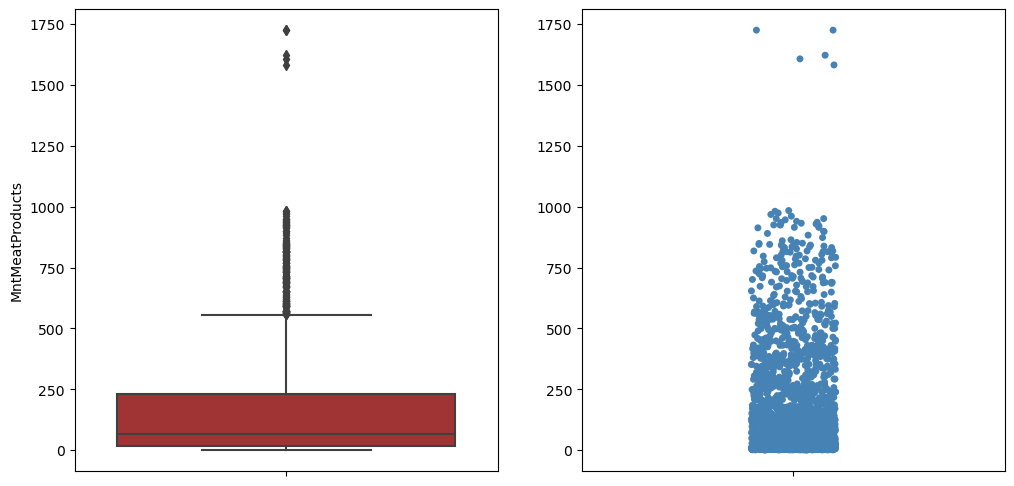

In [395]:
plot_num(products,'MntMeatProducts')

## Variável: MntFishProducts

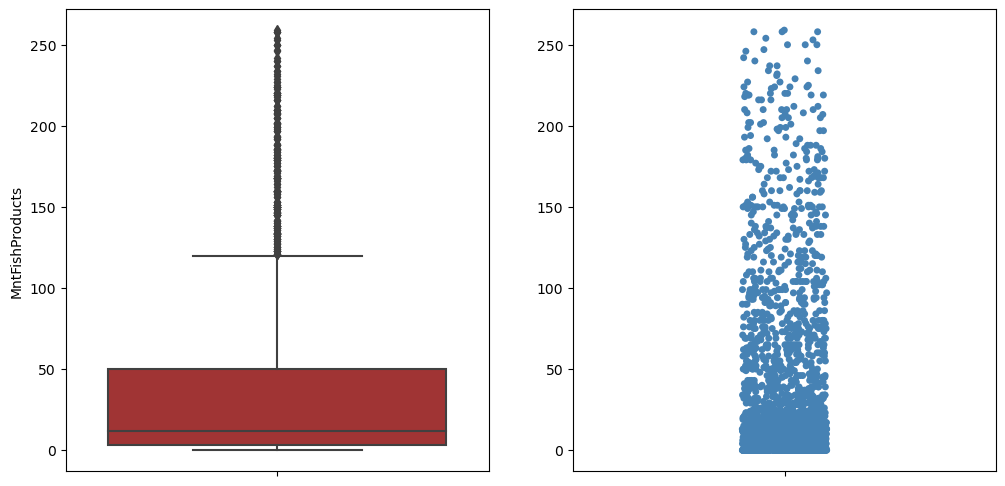

In [396]:
plot_num(products,'MntFishProducts')

## Variável: MntSweetProducts

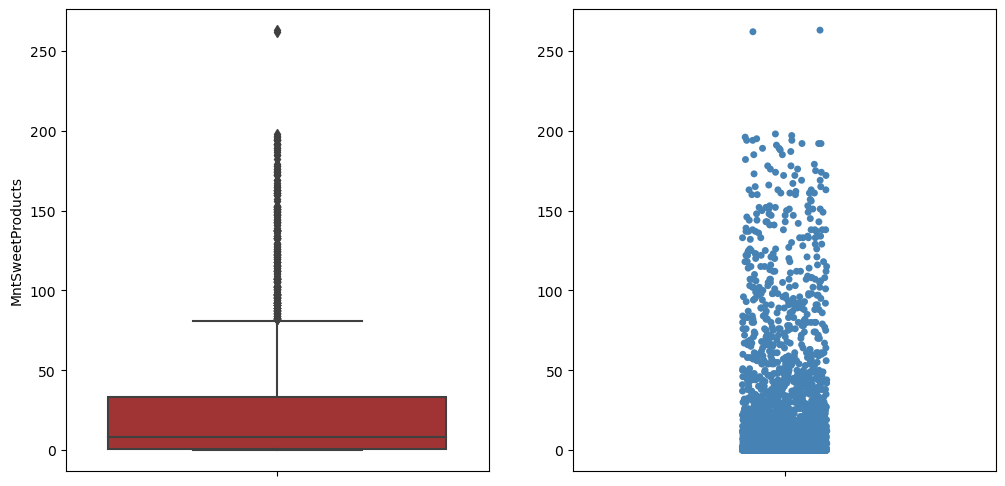

In [397]:
plot_num(products,'MntSweetProducts')

## Variável: MntGoldProds

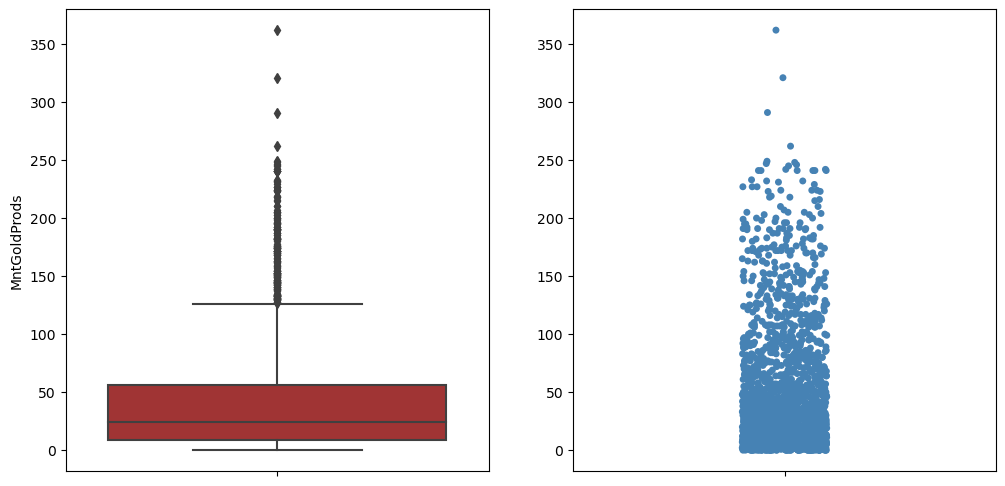

In [398]:
plot_num(products,'MntGoldProds')

Podemos perceber que as variáveis anteriores, que representam os gastos em cada categoria de produto, são muito similares na sua distribuição. Como estamos analisando o valor absoluto gasto por cada cliente, fica difícil de fazer uma comparação entre as variáveis por não sabemos o quando represente a aquele gasto em relação ao todo. 

Sendo assim, vamos criar uma nova variável **"TotalAmountSpent"** que calculara a soma de todos os gastos para cada cliente. 

## Nova Variável: TotalAmountSpent

In [399]:
# Criando a nova variável:

products['TotalAmountSpent'] = products.MntWines + products.MntFruits + products.MntMeatProducts + products.MntFishProducts \
                               + products.MntSweetProducts + products.MntGoldProds

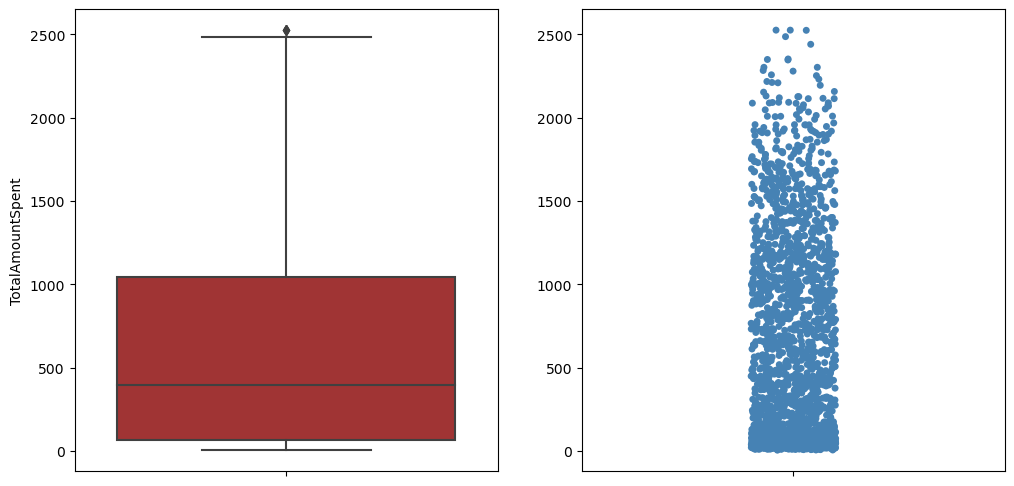

In [400]:
plot_num(products, 'TotalAmountSpent')

Uma melhor maneira de avaliar os gastos por categoria de produto é olharmos para o percentual gasto por cada cliente em cada categoria, sendo assim, vamos alterar as variáveis para o percentual já que agora temos o total gasto por cada cliente. 

In [401]:
# Mudando todas as variáveis para % de gasto

products.MntWines = products.MntWines/products['TotalAmountSpent']
products.MntFruits = products.MntFruits/products['TotalAmountSpent']
products.MntMeatProducts = products.MntMeatProducts/products['TotalAmountSpent']
products.MntFishProducts = products.MntFishProducts/products['TotalAmountSpent'] 
products.MntSweetProducts = products.MntSweetProducts/products['TotalAmountSpent'] 
products.MntGoldProds = products.MntGoldProds/products['TotalAmountSpent']

In [402]:
products.head()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent
0,5524,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,1617
1,2174,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,27
2,4141,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,776
3,6182,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,53
4,5324,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,422


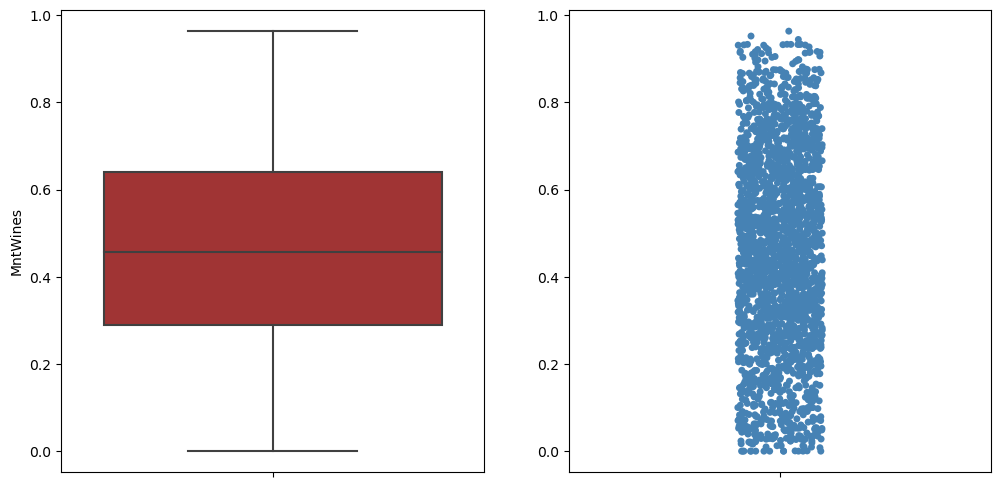

In [403]:
# Verificando o resultado na variável "MntWines":
plot_num(products,'MntWines')

Analisando novamente a variável **"MntWines"**, agora calculada como percentual gasto em vinhos por cada cliente, podemos ter uma ideia melhor sobre como os clientes estão gastante em relação ao vinho. **Podemos perceber que a maioria gasta próximo de 40% a 50% com vinhos nessa empresa**. Chama a atenção por ser um valor bastante alto, é um departamento que a empresa precisa ter uma atenção especial por representar uma fatia muito grande dos gastos dos clientes. Além disso, temos clientes que gastam pouco ou quase nada e também os clientes que compram apenas vinhos, praticamente representando quase 100% do gasto total. 

<a id="3.3"></a>
### <p style="background-color:#084C61;font-family:verdana;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">3.3. Variáveis "Promotion"</p> 

Esse terceiro conjunto de variáveis represente a efetividade de algumas campanhas de ofertas que a empresa fez para atrair os clientes. Os variáveis representam se os clientes aceitaram ou não cada uma das campanhas ofertadas. Como a dimensão dos dados é um fator que precisa ser levado em consideração, vamos aglomerar essas variáveis em uma só. Não faremos distinção em relação a qual campanha cada cliente correspondeu, vamos analisar apenas a quantas campanhas cada cliente foi impactado.

Sendo assim, vamos criar a variável **"AcceptedCmp"** que contará a quantidade de campanhas que foram efetivas ao cliente. Sendo 0 o caso onde o cliente rejeitou todas as campanhas. 

* **AcceptedCmp1**: 1 se o consumidor aceitou a oferta na primeira campanha, 0 caso contrário.
* **AcceptedCmp2**: 1 se o consumidor aceitou a oferta na segunda campanha, 0 caso contrário.
* **AcceptedCmp3**: 1 se o consumidor aceitou a oferta na terceira campanha, 0 caso contrário.
* **AcceptedCmp4**: 1 se o consumidor aceitou a oferta na quarta campanha, 0 caso contrário.
* **AcceptedCmp5**: 1 se o consumidor aceitou a oferta na quinta campanha, 0 caso contrário.
* **Response**: 1 1 se o consumidor aceitou a oferta na última campanha, 0 caso contrário.

In [404]:
promotion = df[['ID', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']]

In [405]:
promotion.head()

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,5524,0,0,0,0,0,1
1,2174,0,0,0,0,0,0
2,4141,0,0,0,0,0,0
3,6182,0,0,0,0,0,0
4,5324,0,0,0,0,0,0


In [406]:
# Verificando a presença de valores nulos:
show_null(promotion)

,Quantidade,% de nulos,Tipo
ID,0,0.0,int64
AcceptedCmp1,0,0.0,int64
AcceptedCmp2,0,0.0,int64
AcceptedCmp3,0,0.0,int64
AcceptedCmp4,0,0.0,int64
AcceptedCmp5,0,0.0,int64
Response,0,0.0,int64


In [407]:
# Criando a nova variável:
promotion['AcceptedCmp'] = promotion.AcceptedCmp1 + promotion.AcceptedCmp2 + promotion.AcceptedCmp3 + \
                            promotion.AcceptedCmp4 + promotion.AcceptedCmp5 + promotion.Response

In [408]:
promotion['AcceptedCmp'].describe()

count    2240.000000
mean        0.446875
std         0.890543
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: AcceptedCmp, dtype: float64

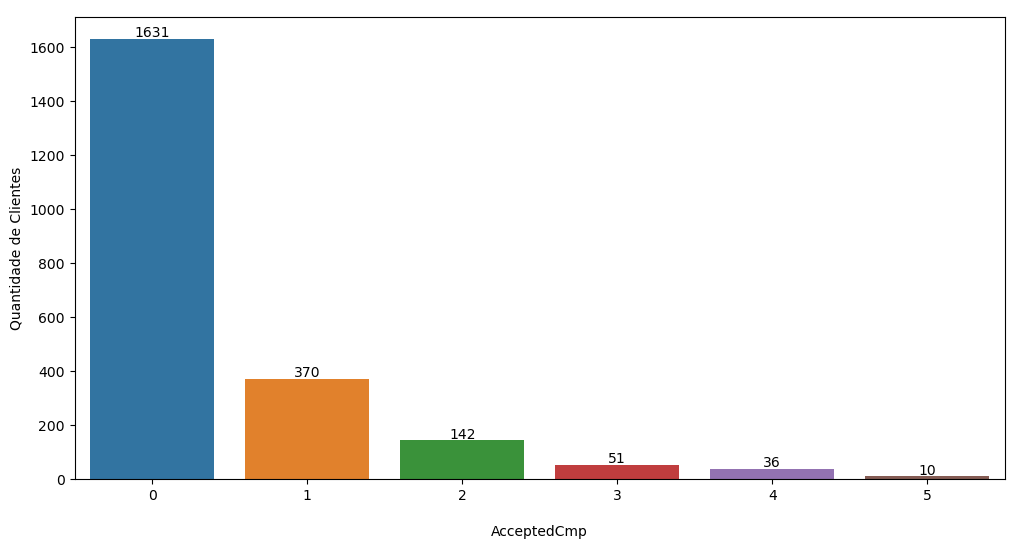

In [409]:
plot_cat(promotion, 'AcceptedCmp')

Aqui podemos perceber que a grande maioria dos clientes não são impactados por campanhas de ofertas. Isso é uma informação importantíssimo para o time de negócios da empresa que deverá pensar em novas estratégias de campanhas de ofertas para que o impacto aumento em relação aos clientes. 

Para o nosso estudo de caso, vamos prosseguir apenas com a nova variável criada. 

In [410]:
# Selecionando a nova variável:
promotion = promotion[['ID','AcceptedCmp']]

In [411]:
promotion.head()

,ID,AcceptedCmp
0,5524,1
1,2174,0
2,4141,0
3,6182,0
4,5324,0


<a id="3.4"></a>
### <p style="background-color:#084C61;font-family:verdana;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">3.4. Variáveis "Place"</p> 

O nosso último conjunto de variáveis diz respeito aos locais de compras, visitas ao site da empresa e etc. São variáveis bem importantes para que entender o nosso maior vetor de venda, entre site, catálogo e loja física. Além disso, podemos entender futuramente se os nossos clientes poucas compras gastante um valor mais alto ou se são do time que fazem muitas compras sem gastar tanto. Junto ao time de negócios, com algumas outras informações poderíamos nos questionar se o custo envolvendo a manutenção das lojas ou sites é interessante, dada a quantidade de compras feitas por esses locais. 

Como as compras dos clientes são divididas entre loja, catálogo e site, precisamos ter o total de compras feitas por cada cliente. Vamos criar uma nova variável **"TotalPurchases"** que calculará o total de compras feitas por cliente.

* **NumWebPurchases**: Número de compras feitas no site da companhia. 
* **NumDealsPurchases**: Número de compras feitas com desconto. 
* **NumCatalogPurchases**: Número de compras feitas  usando o catálogo. 
* **NumStorePurchases**: Número de compras feitas diretamente nas lojas. 
* **NumWebVisitsMonth**: Númerde de visitas ao site da companhia no último mês. 

In [412]:
place = df[['ID','NumWebPurchases','NumDealsPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]

In [413]:
place.head()

,ID,NumWebPurchases,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,8,3,10,4,7
1,2174,1,2,1,2,5
2,4141,8,1,2,10,4
3,6182,2,2,0,4,6
4,5324,5,5,3,6,5


In [414]:
# Verificando a presença de valores nulos:
show_null(place)

,Quantidade,% de nulos,Tipo
ID,0,0.0,int64
NumWebPurchases,0,0.0,int64
NumDealsPurchases,0,0.0,int64
NumCatalogPurchases,0,0.0,int64
NumStorePurchases,0,0.0,int64
NumWebVisitsMonth,0,0.0,int64


In [415]:
# Criando a nova variável "TotalPurchases":
place['TotalPurchases'] = place.NumWebPurchases + place.NumCatalogPurchases + place.NumStorePurchases

In [416]:
place.describe()

,ID,NumWebPurchases,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalPurchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,4.084821,2.325000,2.662054,5.790179,5.316518,12.537054
std,3246.662198,2.778714,1.932238,2.923101,3.250958,2.426645,7.205741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,2.000000,1.000000,0.000000,3.000000,3.000000,6.000000
50%,5458.500000,4.000000,2.000000,2.000000,5.000000,6.000000,12.000000
75%,8427.750000,6.000000,3.000000,4.000000,8.000000,7.000000,18.000000
max,11191.000000,27.000000,15.000000,28.000000,13.000000,20.000000,32.000000


In [417]:
# Verificar os clientes que não gastaram nada. 

place[place.TotalPurchases == 0]

,ID,NumWebPurchases,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalPurchases
655,5555,0,0,0,0,0,0
981,3955,0,0,0,0,14,0
1245,6862,0,15,0,0,20,0
1524,11110,0,0,0,0,14,0
1846,9931,0,15,0,0,19,0
2132,11181,0,0,0,0,0,0


Podemos perceber a presença de alguns clientes que não fizeram compras, porém dois clientes chama a atenção por conterem 15 compras em promoção, que é algo que não faz sentido. Sendo assim, pela presença irrisória, vamos excluir esses clientes pela falta de clareza nos dados. 

In [418]:
# Existem dois registros estranhos

place = place[place.TotalPurchases > 0]

Uma maneira melhor de entender a distribuição dos locais de compras de cada cliente é olhar de forma percentual. Como já possuímos o total de compras feitas, vamos passar todas os locais de compras para percentuam, simplesmente dividindo pelo total de compras. 

In [419]:
place['NumWebPurchases'] = place['NumWebPurchases']/place['TotalPurchases']
place['NumCatalogPurchases'] = place['NumCatalogPurchases']/place['TotalPurchases']
place['NumStorePurchases'] = place['NumStorePurchases']/place['TotalPurchases']
place['NumDealsPurchases'] = place['NumDealsPurchases']/place['TotalPurchases']

In [420]:
place.describe()

,ID,NumWebPurchases,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalPurchases
count,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000
mean,5585.427037,0.329874,0.247963,0.164809,0.505317,5.300806,12.570725
std,3245.168172,0.121858,0.356679,0.140668,0.149485,2.372957,7.186011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2817.750000,0.250000,0.083333,0.000000,0.401852,3.000000,6.000000
50%,5453.500000,0.333333,0.200000,0.150000,0.500000,6.000000,12.000000
75%,8419.500000,0.400000,0.333333,0.250000,0.600000,7.000000,18.000000
max,11191.000000,1.000000,15.000000,1.000000,1.000000,20.000000,32.000000


In [421]:
place[place.NumDealsPurchases > 1]

,ID,NumWebPurchases,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalPurchases
1042,10749,0.0,15.0,1.0,0.0,19,1


Esse é mais um caso de um dado que não faz muito sentido, constam 15 compras com desconto porém 1 compra no total. Sendo assim, também vamos excluir esse cliente da análise. 

In [422]:
place = place[place.NumDealsPurchases <= 1]

## Variável: NumWebPurchases

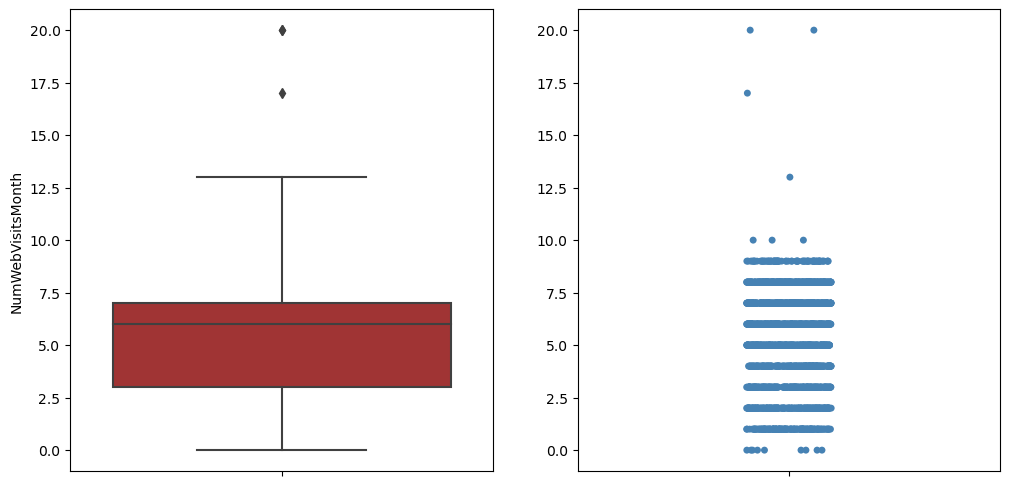

In [423]:
plot_num(place, 'NumWebVisitsMonth')

<a id="3.5"></a>
### <p style="background-color:#084C61;font-family:verdana;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">3.5. Reagrupando os DataFrames</p> 

In [424]:
df_lista = [people, products, promotion, place]

In [425]:
df_final = reduce(lambda df1, df2: pd.merge(df1, df2, on = 'ID'), df_lista)

In [426]:
# Dimensão final do DataFrame:
df_final.shape

(2203, 25)

In [427]:
# Remover a coluna ID, ela não é mais necessária para nosso estudo. 
df_final.drop(columns=['ID'], inplace = True)


<a id="4"></a>
## <p style="background-color:#084C61;font-family:verdana;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">4. Normalização das Variáveis</p> 

O processo de **normalização** de variável em Machine Learning é uma etapa crucial do pré-processamento dos dados. A normalização trata de garantir que todas as variáveis estejam numa mesma escala, haja visto que diferentes escalas podem contribuir para um mau desempenho do modelo. No nosso caso, por exemplo, temos variáveis que variam pouco como as porcentagens de gastos em determinados produtos, ou até mesmo o número de compras, enquanto que outras variáveis variam em números muito maiores, como é o caso do **"Income"** ou do **"TotalAmountSpent"**. Sendo assim, queremos que todas as variáveis estajam numa mesma escala da variação para que isso não influencia na "importância" dada para uma ou outra variável. A normalização contribui para um melhor desempenho do modelo, evitar viés em algorítmos baseados em distância e melhoria da convergência em alguns outros modelos de Machine Learning.

Lembrando que o modelo que usaremos, o **KMeans**, é um modelo baseado em distância e, por isso, é fundamental a Normalização. Algorítmos baseados em árvores como Decision Tree ou Random Forest não necessitam desse pré-processamento dos dados.

A biblioteca do **sklearn** possui o MinMaxScaler que faz o papel da Normalização. Optamos por fazer de forma manual uma função que obtém o mesmo resultado. 

In [428]:
# Função que normaliza as colunas de um DataFrame:
def scaler(df):
    df2 = df.copy()
    for column in df2:
        minimo = df2[column].min()
        maximo = df2[column].max()
        df2[column] = (df[column] - minimo)/(maximo - minimo)
        return df2

In [429]:
# Applicando a função do DataFrame Final:
df_scaled = scaler(df_final)

In [430]:
df_scaled.describe()

,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,ChildrenHome,LifeTime,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent,AcceptedCmp,NumWebPurchases,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalPurchases
count,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.00000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000
mean,0.516179,2.460281,51954.228779,48.990921,0.103495,0.214707,0.647299,0.034498,0.950068,15.070222,0.459599,0.049198,0.249131,0.071415,0.050704,0.119951,608.56650,0.449387,0.330002,0.241032,0.164580,0.505419,5.302769,12.601906
std,0.208790,1.004819,21213.961143,28.969963,0.304674,0.410712,0.477919,0.182547,0.748752,6.742838,0.228731,0.055612,0.125819,0.078045,0.060945,0.108992,602.60048,0.892777,0.120862,0.172198,0.139301,0.148665,2.351981,7.183651
min,0.000000,0.000000,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.266667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.339286,2.000000,35364.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.300000,0.290323,0.008912,0.156184,0.012560,0.008632,0.038020,69.00000,0.000000,0.250000,0.083333,0.000000,0.400000,3.000000,6.000000
50%,0.535714,2.000000,51373.000000,49.000000,0.000000,0.000000,1.000000,0.000000,1.000000,15.133333,0.460286,0.029601,0.233333,0.048023,0.033058,0.084615,398.00000,0.000000,0.333333,0.200000,0.150000,0.500000,6.000000,12.000000
75%,0.660714,3.000000,68474.500000,74.000000,0.000000,0.000000,1.000000,0.000000,1.000000,20.900000,0.642228,0.069221,0.328173,0.103448,0.070304,0.169782,1048.00000,1.000000,0.400000,0.333333,0.250000,0.600000,7.000000,19.000000
max,1.000000,4.000000,162397.000000,99.000000,1.000000,1.000000,1.000000,1.000000,3.000000,26.566667,0.963303,0.445545,0.997110,0.590909,0.945848,0.894150,2525.00000,5.000000,1.000000,1.000000,1.000000,1.000000,20.000000,32.000000


**Aqui podemos perceber que agora todas as colunas possuem valores entre 0 e 1.** Essa é a característica fundamental do processo de normalização.  

<a id="5"></a>
## <p style="background-color:#084C61;font-family:verdana;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">5. Método de Elbow</p>

O método de **Elbow ou "Cotovelo"** é uma técnica utilizada para encontrar um número ideal de clusters (subgrupos) em algoritmos de agrupamentos como o **KMeans**. Queremos dividir os nossos clientes em grupos de forma que os clientes num mesmo grupos sejam mais homogêneos em relação ao todo e definir a quantidade de grupos diferentes nem sempre é fácil. Sendo assim, o método de Elbow calcula a soma das distâncias quadráticas em relação ao centróide do clusters para cada valor possível de clusters. Vamos testar o modelo com valores indo de 1 a 13 clusters e identificar a melhor opção pelo gráfico gerado pela soma dos quadrados das distâncias. O método chama-se **Elbow** pois, em geral, o gráfico final tem uma curva decrescente que se assemelha ao formato do braço e a "melhor quantidade" de clusters é no suposto "cotovelo" do braço. 

Em outras palavras, um novo clusters é dispensado quando não fornece ganhos significativos na redução da soma dos quadrados das distâncias. Sendo assim, o ponto do cotovelo não é o melhor (se tratado da soma das distâncias), mas é o que apresenta a melhor relação custo-benefício. 

É importante ressaltar que o **Método de Elbow não é totalmente preciso** e outras abordagens são possíveis para essa situação. 

In [431]:
# Aplicando o método de Elbow:

inertia = []
num_clusters = range(1,14)

for k in num_clusters:
    Model = KMeans(n_clusters = k)
    Model.fit(df_scaled)
    inertia.append(Model.inertia_)
    print(f'Teste com {k} clusters: Finalizado.')
    

Teste com 1 clusters: Finalizado.
Teste com 2 clusters: Finalizado.
Teste com 3 clusters: Finalizado.
Teste com 4 clusters: Finalizado.
Teste com 5 clusters: Finalizado.
Teste com 6 clusters: Finalizado.
Teste com 7 clusters: Finalizado.
Teste com 8 clusters: Finalizado.
Teste com 9 clusters: Finalizado.
Teste com 10 clusters: Finalizado.
Teste com 11 clusters: Finalizado.
Teste com 12 clusters: Finalizado.
Teste com 13 clusters: Finalizado.


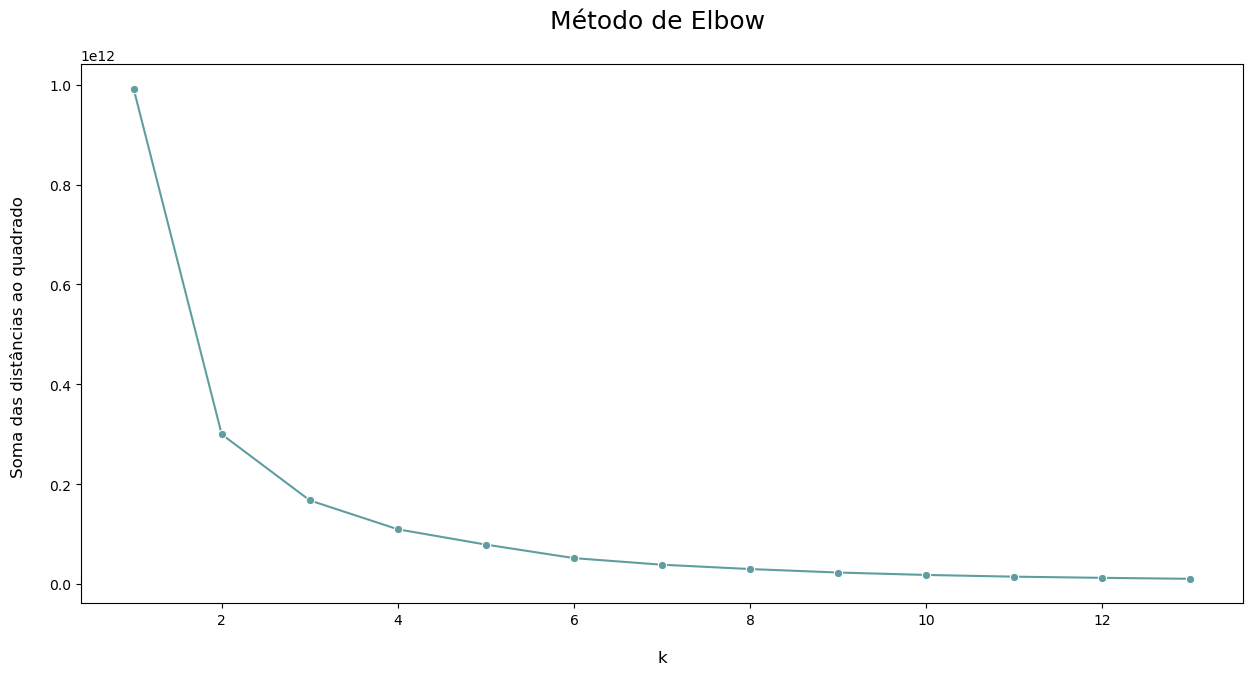

In [432]:
plt.figure(figsize = (15,7))
sns.lineplot(x = num_clusters, y = inertia, color = 'cadetblue', marker = 'o')
plt.xlabel('\nk', size = 12)
plt.ylabel('Soma das distâncias ao quadrado \n', size = 12)
plt.title('Método de Elbow \n', size = 18)
plt.show()

**Visualmente, podemos perceber que 3 ou 4 seriam bons números de clusters para o problema em questão.**

<a id="6"></a>
## <p style="background-color:#084C61;font-family:verdana;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">6. Alocação de Pesos</p>

Após a normalização, todas as variáveis passaram a variar seus valores no intervalo de 0 a 1, assim sendo, o modelo trata-rá todas com igual importância pois estamos calculando distâncias euclidianas de números muito próximos. Mas, você pode achar que uma determinada característica deveria ser priorizada, deveria ter maior relevância para a clusterização dos clientes, como por exemplo o total gasto, ou o número de compras e etc. Esse tipo de valorização de uma característica pode ser feito na etapa de alocação de pesos. 

É complicado definir quais variáveis são mais importâncias e o quão mais importantes elas são em relação as demais. Nessa etapa, é crucial que o time de negócios esteja trabalhando em conjunto para que se crie uma melhor solução para o modelo. 

Como o nosso projeto é para fins de aprendizado, vamos aplicar, sem justificativa, alguns pesos ao modelo. Como todas as variáveis estão entre 0 e 1, basta multiplicar a variável pelo peso desejado. 

Pesos alocados: **TotalAmountSpent** peso 8, **TotalPurchases** peso 6, **Recency, NumWebVisitsMonth, Income e LifeTime** peso 4, **Year_Birth, ChildrenHome e Education** peso 2. As variáveis restantes seguem com peso 1. 

In [433]:
df_scaled.TotalAmountSpent = 8*df_scaled.TotalAmountSpent
df_scaled.TotalPurchases = 6*df_scaled.TotalPurchases
df_scaled.Recency = 4*df_scaled.Recency
df_scaled.NumWebVisitsMonth = 4*df_scaled.NumWebVisitsMonth
df_scaled.Income = 4*df_scaled.Income
df_scaled.LifeTime = 4*df_scaled.LifeTime
df_scaled.Year_Birth = 2*df_scaled.Year_Birth
df_scaled.ChildrenHome = 2*df_scaled.ChildrenHome
df_scaled.Education = 2*df_scaled.Education


<a id="7"></a>
## <p style="background-color:#084C61;font-family:verdana;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">7. Modelo K-Means</p>

Existem diversos métodos de machine learning para clusterização, mas optamos por utilizar um método mais intuitivo e simples, que é o **K-Means**. O objetivo da clusterização, como já comentado anteriormente, é agrupar os dados em subgrupos mais homogêneos. Esses subgrupos chamamos de clusters. No caso atual, vamos separar todos os clientes em 3 clusters diferentes. 

**Funcionamento Básico do Método**: O algoritmo seleciona aleatoriamente 3 pontos iniciais para serem os 'centróides', pontos centrais da nuvem de pontos que compõe o cluster. Atribui cada cliente a um cluster calculando a distância euclidiana ao 'centróide' mais próximo e depois recalcula o 'centróide' pela média dos valores do cluster. O modelo repete esse processo até que não haja mudança significativa ou até atingir um número máximo de iterações. Ao final do processo, cada cliente será rotulado a um único cluster. 

Como vimos pelo **Método de Elbow**, vamos atribuir o parâmetro **n_clusters = 3** que define em 3 o número de clusters do modelo.  

In [447]:
# Definindo o modelo:
Model = KMeans(n_clusters = 3)

In [448]:
# Aplicando o Modelo:
clusters = Model.fit_predict(df_scaled)

In [449]:
# Resultados do modelo:
clusters

array([0, 0, 1, ..., 0, 1, 0])

In [450]:
# Conectando o resultado aos dados:
df_final['cluster'] = clusters

<a id="7.1"></a>
## <p style="background-color:#084C61;font-family:verdana;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">7.1. Salvando o Modelo</p>

In [438]:
# Salvando mo modelo na memória do PC:
filename = 'modelo_clusterizacao.sav'
pickle.dump(Model, open(filename, 'wb'))

<a id="8"></a>
## <p style="background-color:#084C61;font-family:verdana;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">8. Resultados</p>

Com os clusters já atribuídos, vamos dar uma olhada nos resultados do modelo. Ver a quantidade de clientes por cluster, média das variáveis por cluster e alguns gráficos das principais variáveis também separados por cluster. 

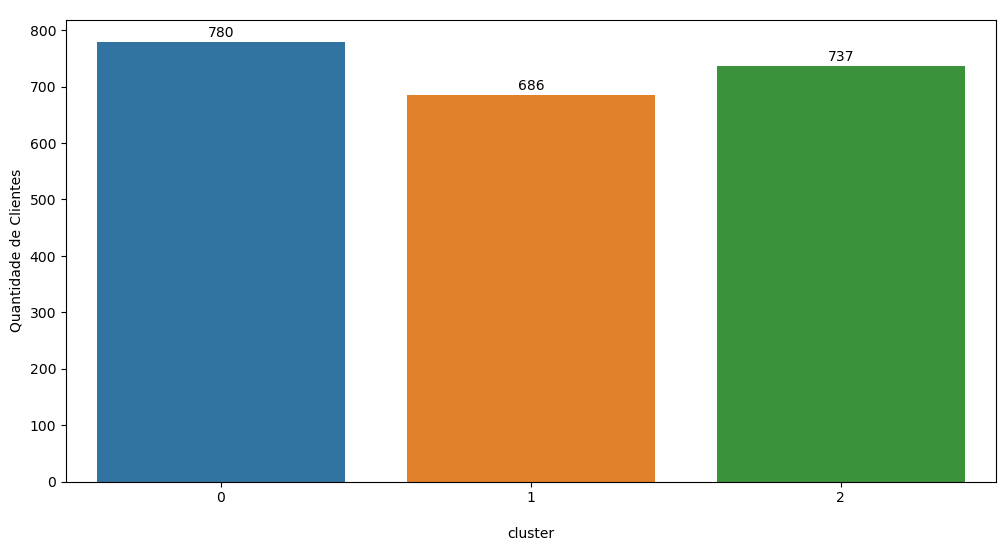

In [451]:
plot_cat(df_final,'cluster')

A quantidade de clientes por cluster está bem equilibrada, uma diferença de menos de 100 clientes do maior para o menor cluster. 

In [454]:
# Média das Variáveis por cluster:

pd.set_option('display.max_columns', None)
df_final.groupby('cluster').mean()

,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,ChildrenHome,LifeTime,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent,AcceptedCmp,NumWebPurchases,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalPurchases
cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,1966.062821,2.615385,52347.991026,49.453846,0.120513,0.202564,0.633333,0.043590,1.229487,15.391325,0.576838,0.034990,0.201164,0.048361,0.034491,0.104155,495.544872,0.300000,0.355718,0.263059,0.150528,0.493754,5.706410,13.102564
1,1967.520408,2.552478,76670.405248,48.953353,0.100583,0.205539,0.651603,0.042274,0.443149,14.692371,0.479743,0.046575,0.298919,0.066125,0.050226,0.058412,1288.397959,0.880466,0.282450,0.087914,0.278949,0.438601,3.190962,19.332362
2,1973.204885,2.210312,28531.662144,48.535957,0.088195,0.236092,0.658073,0.017639,1.126187,15.082090,0.316770,0.066678,0.253555,0.100739,0.068310,0.193949,95.394844,0.206242,0.347046,0.360241,0.072996,0.579957,6.841248,5.807327


## Cluster 0:
   **Principais Características:**
   * Grupos de clientes com maior nível educacional.
   * Grupo de clientes com a renda média intermediária.
   * Em geral, os clientes possuem crianças ou adolescentes em cada, média de 1,22. 
   * São os clientes que gastam o maior valor percentual em vinhos e o menor em frutas, carnes, peixes e doces.
   * A média do gasto total desse cluster é intermediário também e não são tão sujeitos a promoções. 
   * É o segundo cluster que mais acessa o site porém o que mais compra na web. 
   * Um grupo que faz um bom número de compras. 
   
## Cluster 1:
   **Principais Características:**
   * É o grupo de clientes que mais faz compras e mais gasta. 
   * Possuem um nível educacional um pouco mais elevado e é o grupo com a maior renda. 
   * Grupo com a menor presença de crianças ou adolescentes.
   * São os clientes a menos tempo de vínculo com a empresa. 
   * Seus gastos concentram-se mais em vinhos e carnes.
   * É o grupo que mais aceitou campanhas de ofertas.
   * É o grupo que menos acesso ao website, faz muitas compras por catálogo ou em loja física.
   
## Cluster 2:
   **Principais Características:**
   * Esse grupo é formado pelo clientes que menos fazem compras e menos gastam. 
   * Possuem a menor renda média, além de serem mais jovens e com um nível educacional menor.
   * Grupo que possui uma média de filhos alta. 
   * Percentualmente, seus principais gastos são vinhos, carnes e produtos de ouro.
   * É o grupo menos impactado por campanhas de ofertas, que mais acessa ao website. 
   * Costuma comprar pela internet mas as lojas físicas ainda predominam os casos. 
   
As demais variáveis não mencionadas possuem valores médios muito próximos para todos os clusters.


### Variável "TotalAmountSpent"

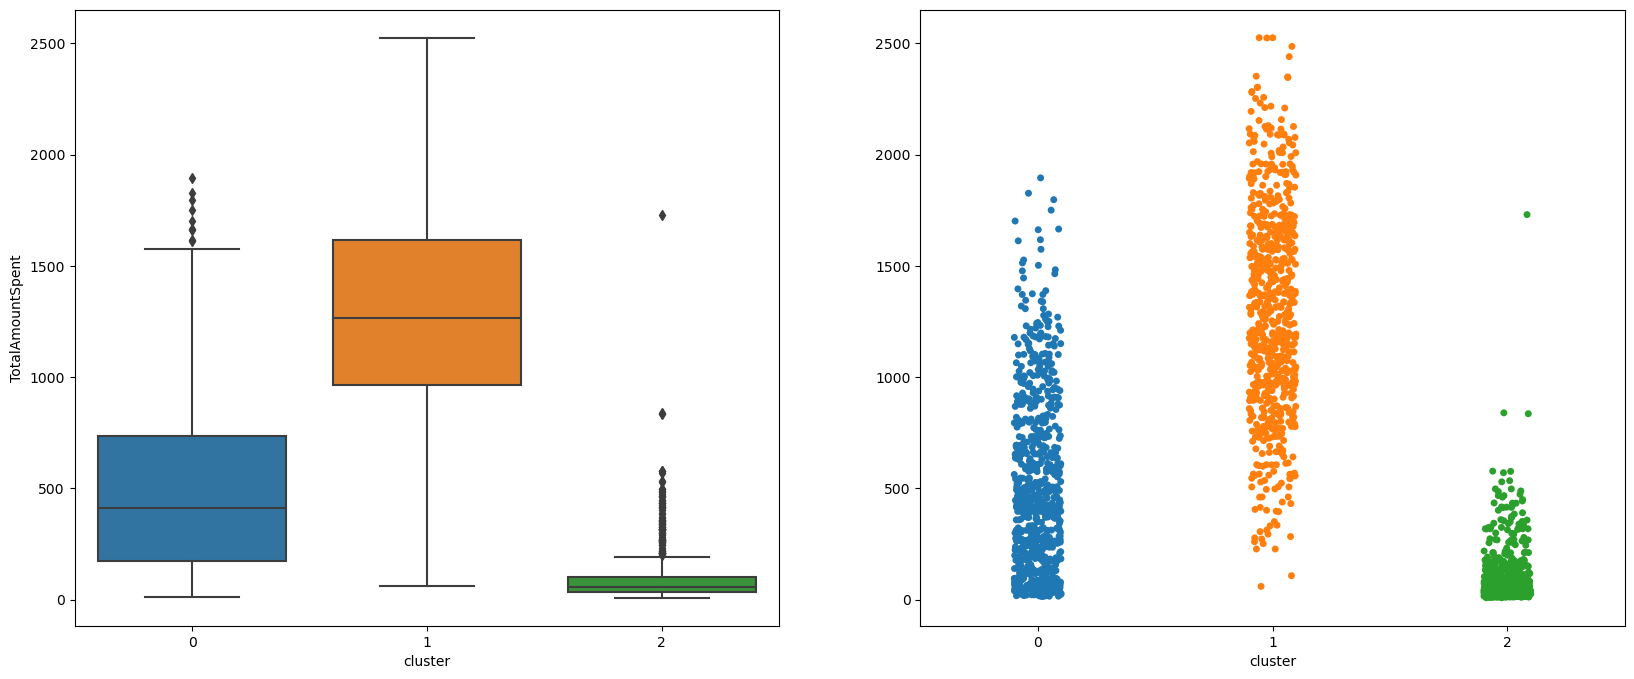

In [455]:
fig = plt.figure(figsize=(20,8))
gs = GridSpec(1,2)
sns.boxplot(x = 'cluster', y='TotalAmountSpent', data = df_final, ax=fig.add_subplot(gs[0,0]))
plt.ylabel('TotalAmountSpent')
plt.xlabel('cluster')
sns.stripplot(x = 'cluster', y='TotalAmountSpent', data = df_final, ax=fig.add_subplot(gs[0,1]))
plt.ylabel(None)
plt.xlabel('cluster')
plt.show()

Podemos ver que o **cluster 2** é predominantemente formado pelas pessoas com a renda mais baixa, o **cluster 1** cobre uma faixa de renda maior, com uma distribuição de clientes com muitas valores diferentes para a renda. O **cluster 0** possui também clientes de renda mais baixa e média. 

### Variável "TotalPurchases"

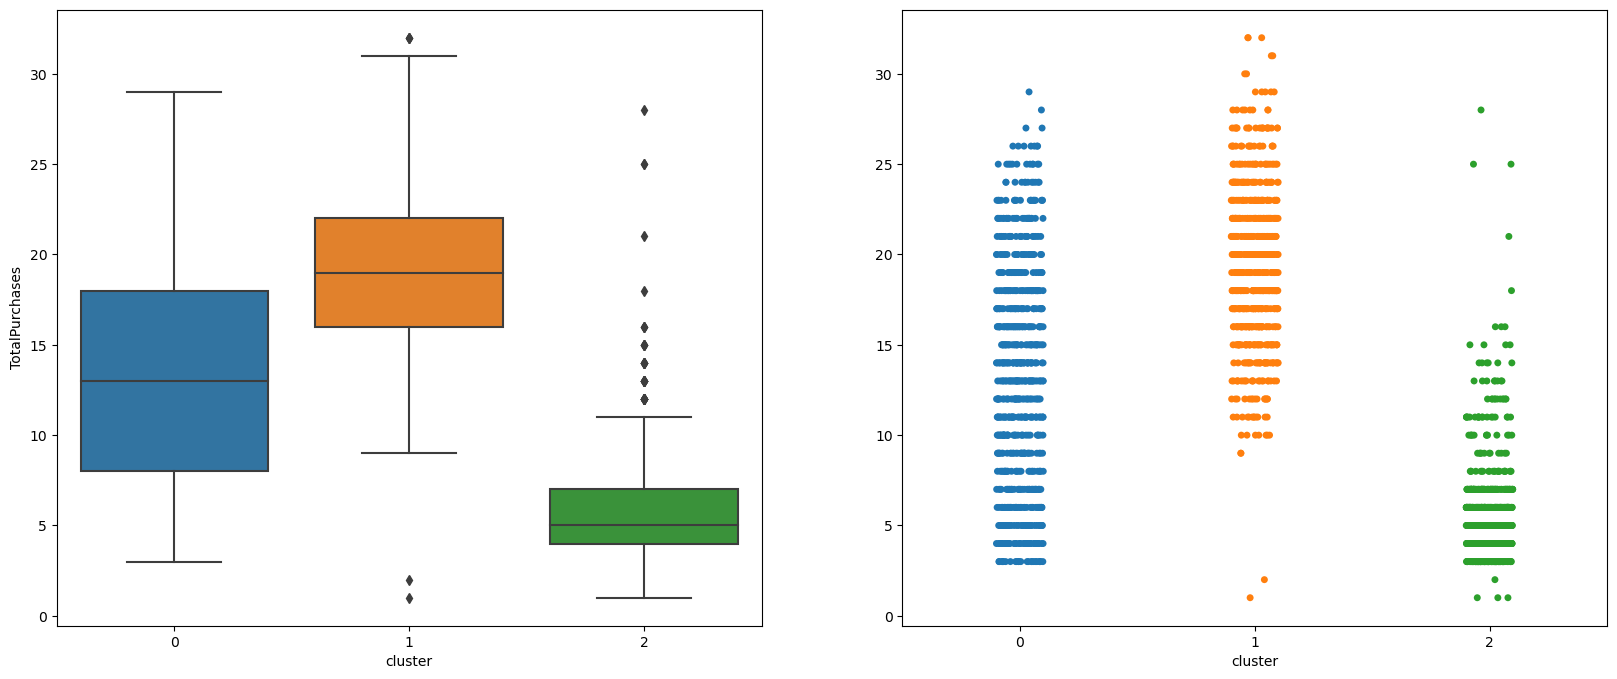

In [456]:
fig = plt.figure(figsize=(20,8))
gs = GridSpec(1,2)
sns.boxplot(x = 'cluster', y='TotalPurchases', data = df_final, ax=fig.add_subplot(gs[0,0]))
plt.ylabel('TotalPurchases')
plt.xlabel('cluster')
sns.stripplot(x = 'cluster', y='TotalPurchases', data = df_final, ax=fig.add_subplot(gs[0,1]))
plt.ylabel(None)
plt.xlabel('cluster')
plt.show()

O número de compras totais segue um padrão bastante parecido com a variável anterior. Os grupos com maior renda também são os grupos que mais fazem compras. 

### Variável "NumDealsPurchases"

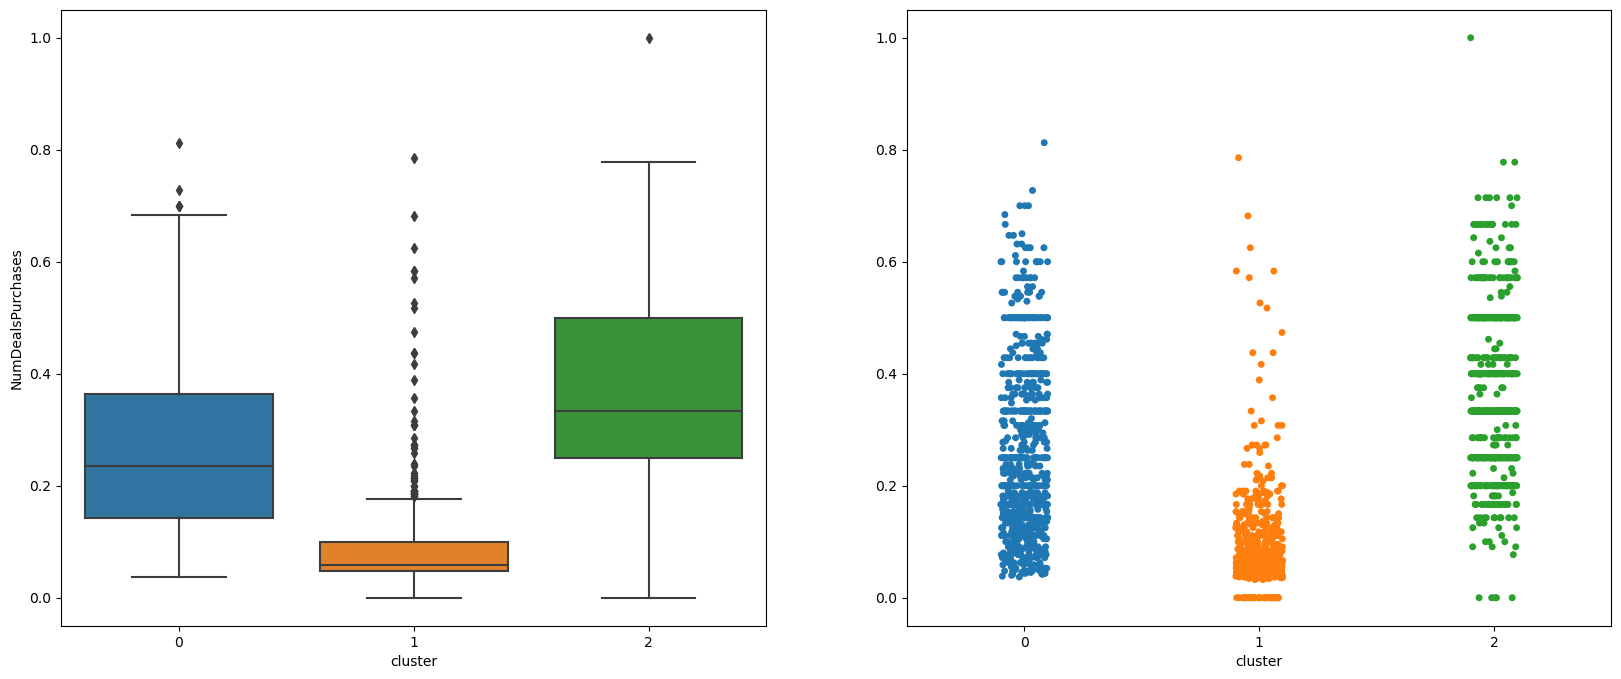

In [457]:
fig = plt.figure(figsize=(20,8))
gs = GridSpec(1,2)
sns.boxplot(x = 'cluster', y='NumDealsPurchases', data = df_final, ax=fig.add_subplot(gs[0,0]))
plt.ylabel('NumDealsPurchases')
plt.xlabel('cluster')
sns.stripplot(x = 'cluster', y='NumDealsPurchases', data = df_final, ax=fig.add_subplot(gs[0,1]))
plt.ylabel(None)
plt.xlabel('cluster')
plt.show()


Apesar de comprarem bastante, o **cluster 1** não opta muito por promoções. Diferente do **cluster 2** que, mesmo comprando pouco, opta mais por promoções. 

### Variável "Income"

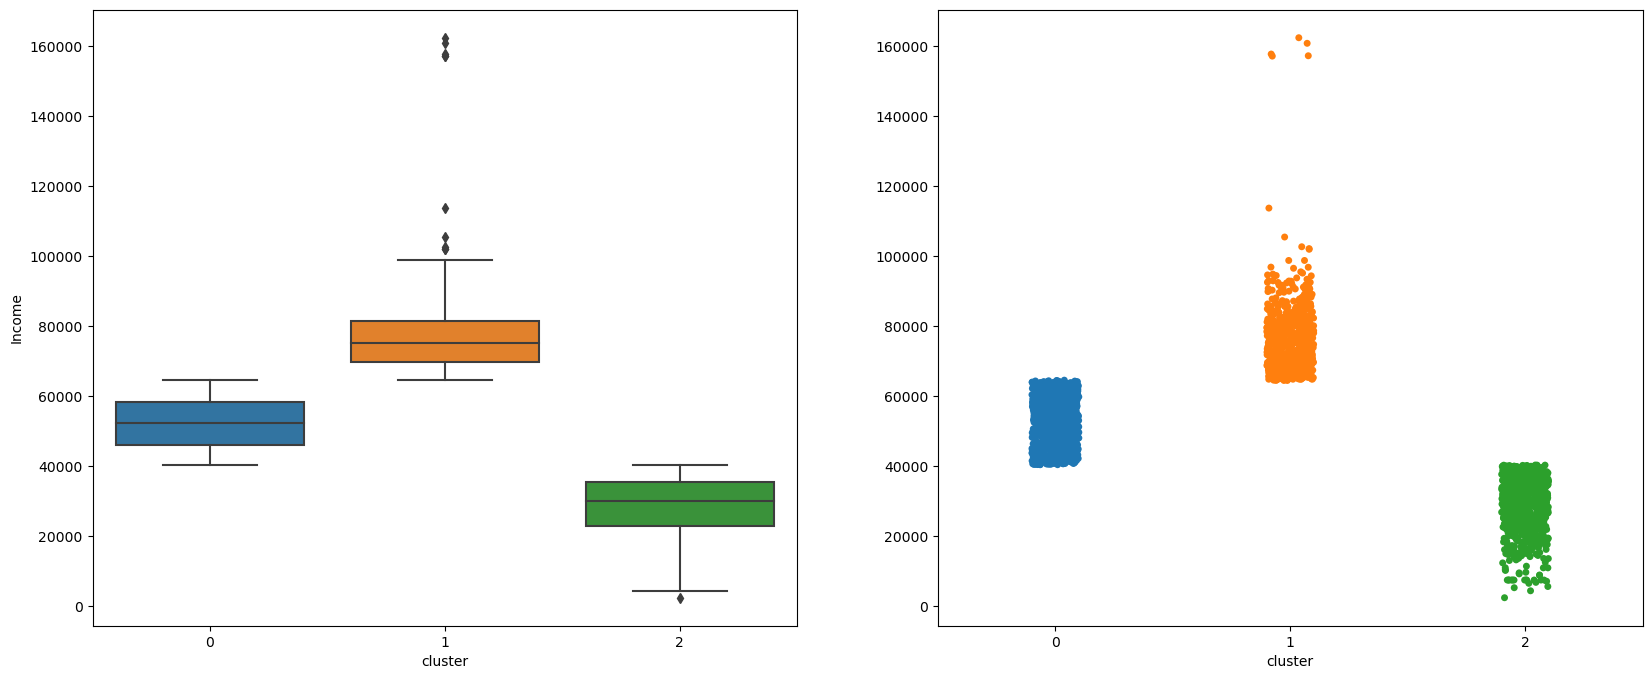

In [458]:
fig = plt.figure(figsize=(20,8))
gs = GridSpec(1,2)
sns.boxplot(x = 'cluster', y='Income', data = df_final, ax=fig.add_subplot(gs[0,0]))
plt.ylabel('Income')
plt.xlabel('cluster')
sns.stripplot(x = 'cluster', y='Income', data = df_final, ax=fig.add_subplot(gs[0,1]))
plt.ylabel(None)
plt.xlabel('cluster')
plt.show()

Como é de se esperar, a renda anual parece ter uma relação grande com o número de compras feitas e também com o total gasto nas compras. 

<a id="8.1"></a>
## <p style="background-color:#084C61;font-family:verdana;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">8.1. Sugestões de negócios</p>

   * O **Cluster 1** representa o público com maior renda, maior número de compras e maior gasto, só que o gasto é concentrado em vinhos e carnes, representando quase 80% do total. Por se tratar de um conjunto importante para os lucros da empresa, seria interessante que esse grupo também consumisse outros itens. Podemos ver que eles respondem bem as campanhas de ofertas, então podemos pensar em campanhas voltadas para os setores de doces, peixes e outros itens para que eles se interessem mais e possam contribuir ainda mais para a empresa. Além disso, é um grupo que acessa pouco ao site, uma forma de chamar esses clientes para o site pode ser a criação de ofertas exclusivas nas áreas que possuem mais interesse como vinhos e carnes. 
   
   
   * O **Cluster 0** é o cluster com a maior presença de crianças e adolescentes em casa porém não aproveita tanto as campanhas de ofertas. Talvez, possamos atingir esse público com campanhas voltadas para crianças e adolescentes. Além disso, devemos tentar equilibrar os gastos desse grupo, já que gastam, em média, mais de 50% com vinhos. 
   
   
   * O **clustar 2** é o grupo que mais compra em promoções e que menos compra por catálogo. Constuma comprar mais por lojas físicas e website. Como procuram bastante promoções, pode ser interessante a ofertas de promoções exclusiva por catálogo para que possamos atingir esse público de outra forma. 

<a id="9"></a>
## <p style="background-color:#084C61;font-family:verdana;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">9. Conclusão</p>

Em suma, esse projeto foi uma jornada de aprendizado e desenvolvimento de habilidades em Machine Learning e Análise de Dados. Utilizamos as principais bibliotecas de ML e exploramos um conjunto de dados fictícios de um mercado com múltiplos canais de venda. 

Iniciamos a análise exploratória examinando cuidadosamente todas as variáveis disponíveis, criando gráficos informativos e ganhando insights sobre o comportamento dos clientes. A normalização dos dados e a alocação de pesos foram essenciais para garantir que todas as variáveis tivessem um papel justo na clusterização. 

Determinar o número ideal de clusters é um passo crucial na aplicação do método K-Means. Utilizando o método de Elbow, pudemos encontrar uma estimativa sólida para o número de clusters que melhor representam os padrões dos dados. 

A partir da aplicação do algoritmo, obtivemos clusters bem definidos, cada um representando um perfil distinto de clientes. Esses clusters fornecem informações valiosas sobre as proferências e comportamentos dos clientes, oferencendo oportunidades e estratégias de negócios, como a personalização de ofertas direcionadas a grupos específicos de clientes. 

Esse projeto fortaleceu minhas habilidades em ciência de dados e me deu a oportunidade aplicar técnicas de ML em um cenário próximo do real. Espero que esse trabalho sirva como um componente valioso do meu portfólio, demonstrando minha capacidade de transformar dados em insights acionáveis e agregar valor aos negócios por meio da análise dados e machine learning. 